In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,216 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123605 files and dire

In [1]:

import matplotlib.pyplot as plt
import pandas as pd
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

## 복합성

- 드롭아웃 0.5 -> 0.7 -> 0.9  , 그래디언트 클리딩 2.0

- L2 : weight decay = 1e-4 설정

- 학습률 높이기

In [ ]:
import zipfile
import os

# 압축 파일 경로
zip_path = '/content/drive/MyDrive/Skin_Modeling/스킨_2_복합성이진분류.zip'

# 압축을 풀 폴더 경로
extract_path = './'

# 압축 풀기
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# 압축이 풀린 파일 목록 확인
os.listdir(extract_path)

['.config',
 '스킨_2_복합성이진분류',
 '지성모델.pth',
 '스킨_복합성_건성제거',
 '스킨_건성_복합성빼고',
 'drive',
 '스킨_지성',
 '.ipynb_checkpoints',
 'sample_data']

Found 6094 images in /content/스킨_2_복합성이진분류/train
Found 752 images in /content/스킨_2_복합성이진분류/valid


Epoch 1/20: 100%|██████████| 191/191 [01:52<00:00,  1.70it/s]


Epoch 1/20, Loss: 0.7080094739404649, Train Accuracy: 50.73843124384641%, Validation Accuracy: 40.29255319148936%


Epoch 2/20: 100%|██████████| 191/191 [01:51<00:00,  1.71it/s]


Epoch 2/20, Loss: 0.7075832782615542, Train Accuracy: 50.65638332786347%, Validation Accuracy: 52.659574468085104%


Epoch 3/20: 100%|██████████| 191/191 [01:56<00:00,  1.65it/s]


Epoch 3/20, Loss: 0.6940787356561391, Train Accuracy: 54.49622579586479%, Validation Accuracy: 56.38297872340426%


Epoch 4/20: 100%|██████████| 191/191 [01:54<00:00,  1.68it/s]


Epoch 4/20, Loss: 0.6899586591420998, Train Accuracy: 55.037742041352146%, Validation Accuracy: 55.71808510638298%


Epoch 5/20: 100%|██████████| 191/191 [01:52<00:00,  1.69it/s]


Epoch 5/20, Loss: 0.6864114668980943, Train Accuracy: 56.12077453232688%, Validation Accuracy: 61.569148936170215%


Epoch 6/20: 100%|██████████| 191/191 [01:52<00:00,  1.70it/s]


Epoch 6/20, Loss: 0.6775136156231946, Train Accuracy: 57.99146701673777%, Validation Accuracy: 58.909574468085104%


Epoch 7/20: 100%|██████████| 191/191 [01:51<00:00,  1.72it/s]


Epoch 7/20, Loss: 0.6700658092948155, Train Accuracy: 58.976042008532986%, Validation Accuracy: 59.04255319148936%


Epoch 8/20: 100%|██████████| 191/191 [01:51<00:00,  1.71it/s]


Epoch 8/20, Loss: 0.6640819039644371, Train Accuracy: 59.6980636691828%, Validation Accuracy: 62.5%


Epoch 9/20: 100%|██████████| 191/191 [01:52<00:00,  1.70it/s]


Epoch 9/20, Loss: 0.6593893828816438, Train Accuracy: 60.6990482441746%, Validation Accuracy: 59.57446808510638%


Epoch 10/20: 100%|██████████| 191/191 [01:52<00:00,  1.69it/s]


Epoch 10/20, Loss: 0.6495647814261352, Train Accuracy: 62.27436823104693%, Validation Accuracy: 59.973404255319146%


Epoch 11/20: 100%|██████████| 191/191 [01:53<00:00,  1.68it/s]


Epoch 11/20, Loss: 0.6420882409779813, Train Accuracy: 62.55333114538891%, Validation Accuracy: 59.57446808510638%


Epoch 12/20: 100%|██████████| 191/191 [01:52<00:00,  1.70it/s]


Epoch 12/20, Loss: 0.6351140219503673, Train Accuracy: 63.652773219560224%, Validation Accuracy: 61.037234042553195%


Epoch 13/20: 100%|██████████| 191/191 [01:52<00:00,  1.70it/s]


Epoch 13/20, Loss: 0.628737510967005, Train Accuracy: 64.53889071217591%, Validation Accuracy: 60.505319148936174%
Early stopping triggered.
Final model saved to 복합성모델.pth


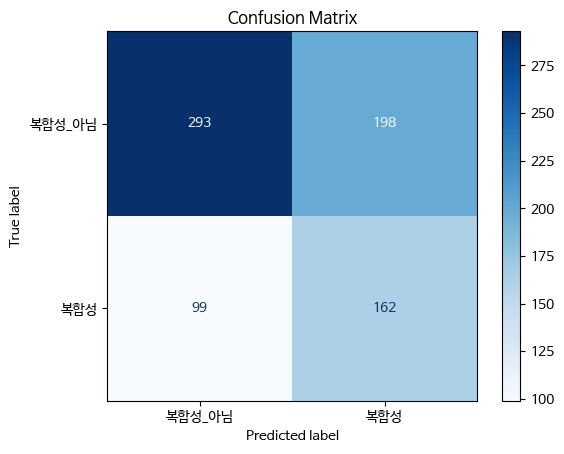

In [ ]:
import os
import torch
import torchvision.models as models
import torchvision.transforms as T
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from PIL import Image
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Custom dataset
class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = os.listdir(root_dir)
        self.data = []

        for label in range(len(self.classes)):
            class_folder = os.path.join(root_dir, self.classes[label])
            for subfolder in os.listdir(class_folder):
                subfolder_path = os.path.join(class_folder, subfolder)
                if os.path.isdir(subfolder_path):
                    for filename in os.listdir(subfolder_path):
                        img_path = os.path.join(subfolder_path, filename)
                        if img_path.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                            self.data.append((img_path, label))

        print(f"Found {len(self.data)} images in {root_dir}")

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path, label = self.data[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, label

# 경로 및 배치 크기 설정
data_dir = "."
batch_size = 32

# 데이터 증강 포함한 이미지 전처리
transform = T.Compose([
    T.RandomResizedCrop(224, scale=(0.8, 1.0)),
    T.RandomHorizontalFlip(),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 학습 및 검증 데이터셋 생성
train_dataset = CustomDataset(os.path.join(data_dir, '/content/스킨_2_복합성이진분류/train'), transform=transform)
valid_dataset = CustomDataset(os.path.join(data_dir, '/content/스킨_2_복합성이진분류/valid'), transform=transform)

# 클래스 불균형 해결: 가중치 샘플링 적용
labels = [label for _, label in train_dataset.data]
label_counts = np.bincount(labels)
class_weights = 1. / label_counts
sample_weights = [class_weights[label] for label in labels]

# 가중치 샘플러 적용
sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=sampler)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

# 사전 학습된 resnext50_32x4d 모델 사용, 레이어 줄임
model = models.resnext50_32x4d(weights=models.ResNeXt50_32X4D_Weights.DEFAULT)

# 모든 레이어 학습 가능하도록 설정
for param in model.parameters():
    param.requires_grad = True

# 출력 레이어를 은닉층 1개로 축소
model.fc = torch.nn.Sequential(
    torch.nn.Dropout(0.9),  # 드롭아웃으로 과적합 방지 드롭아웃 0.7 -> 0.9
    torch.nn.Linear(model.fc.in_features, 128),  # 은닉층 1개
    torch.nn.BatchNorm1d(128), # 배치 정규화
    torch.nn.ReLU(),
    torch.nn.Linear(128, 1),  # 출력 레이어
    torch.nn.Sigmoid()  # Sigmoid 활성화 함수
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 손실 함수 및 옵티마이저 설정
criterion = torch.nn.BCELoss()  # 이진 분류에 적합한 손실 함수
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001 , weight_decay=1e-4) # L2 가중치 조정

# Early Stopping 설정
early_stopping_patience = 5
best_val_accuracy = 0
patience_counter = 0

# 모델을 저장할 경로 설정
model_save_path = '복합성모델.pth'

# 학습 과정
num_epochs = 20
max_grad_norm = 2.0  # 그래디언트 클리핑 임계값 설정

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    train_loader_iter = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")

    for images, labels in train_loader_iter:
        images, labels = images.to(device), labels.to(device).float().view(-1, 1)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()

        # 그래디언트 클리핑 적용
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)

        optimizer.step()

        running_loss += loss.item()
        predicted = (outputs > 0.5).float()
        total_train += labels.size(0)
        correct_train += (predicted.eq(labels)).sum().item()

    train_accuracy = 100 * correct_train / total_train

    # 검증 평가
    model.eval()
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    with torch.no_grad():
        for images, labels in valid_loader:
            images, labels = images.to(device), labels.to(device).float().view(-1, 1)
            outputs = model(images)
            predicted = (outputs > 0.5).float()
            total += labels.size(0)
            correct += (predicted.eq(labels)).sum().item()
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    valid_accuracy = 100 * correct / total
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}, Train Accuracy: {train_accuracy}%, Validation Accuracy: {valid_accuracy}%")

    # Early Stopping 체크
    if valid_accuracy > best_val_accuracy:
        best_val_accuracy = valid_accuracy
        patience_counter = 0
        # 모델 저장
        # torch.save(model.state_dict(), model_save_path)
        # print(f"Model saved to {model_save_path}")
    else:
        patience_counter += 1
        if patience_counter >= early_stopping_patience:
            print("Early stopping triggered.")
            break

# 최종 모델 저장
torch.save(model.state_dict(), model_save_path)
print(f"Final model saved to {model_save_path}")

# 오분류표 시각화
conf_matrix = confusion_matrix(y_true, y_pred)

# 클래스 이름 가져오기
class_names = train_dataset.classes  # 원래 클래스 이름을 가져옵니다.

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## 중성

In [2]:
import zipfile
import os

# 압축 파일 경로
zip_path = '/content/drive/MyDrive/Skin_Modeling/스킨_중성.zip'

# 압축을 풀 폴더 경로
extract_path = './'

# 압축 풀기
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# 압축이 풀린 파일 목록 확인
os.listdir(extract_path)

['.config', '스킨_중성', 'drive', 'sample_data']

Found 4732 images in /content/스킨_중성/train
Found 752 images in /content/스킨_중성/valid


Downloading: "https://download.pytorch.org/models/resnext50_32x4d-1a0047aa.pth" to /root/.cache/torch/hub/checkpoints/resnext50_32x4d-1a0047aa.pth
100%|██████████| 95.8M/95.8M [00:02<00:00, 44.0MB/s]
Epoch 1/20: 100%|██████████| 148/148 [01:31<00:00,  1.62it/s]


Epoch 1/20, Loss: 0.6912412554831118, Train Accuracy: 54.67032967032967%, Validation Accuracy: 54.52127659574468%


Epoch 2/20: 100%|██████████| 148/148 [01:22<00:00,  1.79it/s]


Epoch 2/20, Loss: 0.6308414799136084, Train Accuracy: 64.85629754860524%, Validation Accuracy: 64.62765957446808%


Epoch 3/20: 100%|██████████| 148/148 [01:22<00:00,  1.79it/s]


Epoch 3/20, Loss: 0.5674616777010866, Train Accuracy: 73.56297548605241%, Validation Accuracy: 78.59042553191489%


Epoch 4/20: 100%|██████████| 148/148 [01:24<00:00,  1.76it/s]


Epoch 4/20, Loss: 0.48315543560562907, Train Accuracy: 80.4733727810651%, Validation Accuracy: 84.84042553191489%


Epoch 5/20: 100%|██████████| 148/148 [01:23<00:00,  1.78it/s]


Epoch 5/20, Loss: 0.39223690834399816, Train Accuracy: 86.81318681318682%, Validation Accuracy: 89.49468085106383%


Epoch 6/20: 100%|██████████| 148/148 [01:28<00:00,  1.68it/s]


Epoch 6/20, Loss: 0.3101978136880978, Train Accuracy: 90.82840236686391%, Validation Accuracy: 93.48404255319149%


Epoch 7/20: 100%|██████████| 148/148 [01:23<00:00,  1.77it/s]


Epoch 7/20, Loss: 0.25277343553465764, Train Accuracy: 93.11073541842772%, Validation Accuracy: 95.47872340425532%


Epoch 8/20: 100%|██████████| 148/148 [01:27<00:00,  1.69it/s]


Epoch 8/20, Loss: 0.2048755729117909, Train Accuracy: 95.16060862214708%, Validation Accuracy: 96.01063829787235%


Epoch 9/20: 100%|██████████| 148/148 [01:25<00:00,  1.74it/s]


Epoch 9/20, Loss: 0.17571799205364408, Train Accuracy: 96.23837700760778%, Validation Accuracy: 97.34042553191489%


Epoch 10/20: 100%|██████████| 148/148 [01:23<00:00,  1.77it/s]


Epoch 10/20, Loss: 0.15264147006579348, Train Accuracy: 97.21048182586644%, Validation Accuracy: 96.1436170212766%


Epoch 11/20: 100%|██████████| 148/148 [01:23<00:00,  1.77it/s]


Epoch 11/20, Loss: 0.13860290804626169, Train Accuracy: 97.3795435333897%, Validation Accuracy: 98.27127659574468%


Epoch 12/20: 100%|██████████| 148/148 [01:23<00:00,  1.77it/s]


Epoch 12/20, Loss: 0.13104682254630165, Train Accuracy: 97.35841081994928%, Validation Accuracy: 99.33510638297872%


Epoch 13/20: 100%|██████████| 148/148 [01:23<00:00,  1.77it/s]


Epoch 13/20, Loss: 0.11444545799010508, Train Accuracy: 98.24598478444632%, Validation Accuracy: 99.06914893617021%


Epoch 14/20: 100%|██████████| 148/148 [01:24<00:00,  1.75it/s]


Epoch 14/20, Loss: 0.1104285597700525, Train Accuracy: 98.24598478444632%, Validation Accuracy: 98.80319148936171%


Epoch 15/20: 100%|██████████| 148/148 [01:23<00:00,  1.76it/s]


Epoch 15/20, Loss: 0.09993646920633477, Train Accuracy: 98.39391377852917%, Validation Accuracy: 98.67021276595744%


Epoch 16/20: 100%|██████████| 148/148 [01:23<00:00,  1.76it/s]


Epoch 16/20, Loss: 0.08749718933894828, Train Accuracy: 99.00676246830093%, Validation Accuracy: 98.80319148936171%


Epoch 17/20: 100%|██████████| 148/148 [01:23<00:00,  1.77it/s]


Epoch 17/20, Loss: 0.08598595621013963, Train Accuracy: 98.83770076077768%, Validation Accuracy: 98.80319148936171%
Early stopping triggered.
Final model saved to 중성모델.pth


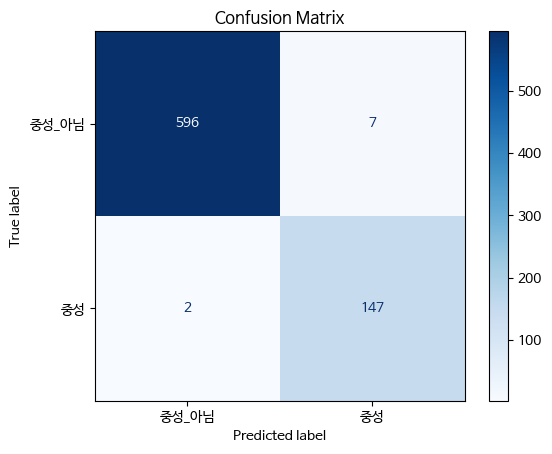

In [3]:
import os
import torch
import torchvision.models as models
import torchvision.transforms as T
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from PIL import Image
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Custom dataset
class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = os.listdir(root_dir)
        self.data = []

        for label in range(len(self.classes)):
            class_folder = os.path.join(root_dir, self.classes[label])
            for subfolder in os.listdir(class_folder):
                subfolder_path = os.path.join(class_folder, subfolder)
                if os.path.isdir(subfolder_path):
                    for filename in os.listdir(subfolder_path):
                        img_path = os.path.join(subfolder_path, filename)
                        if img_path.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                            self.data.append((img_path, label))

        print(f"Found {len(self.data)} images in {root_dir}")

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path, label = self.data[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, label

# 경로 및 배치 크기 설정
data_dir = "."
batch_size = 32

# 데이터 증강 포함한 이미지 전처리
transform = T.Compose([
    T.RandomResizedCrop(224, scale=(0.8, 1.0)),
    T.RandomHorizontalFlip(),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 학습 및 검증 데이터셋 생성
train_dataset = CustomDataset(os.path.join(data_dir, '/content/스킨_중성/train'), transform=transform)
valid_dataset = CustomDataset(os.path.join(data_dir, '/content/스킨_중성/valid'), transform=transform)

# 클래스 불균형 해결: 가중치 샘플링 적용
labels = [label for _, label in train_dataset.data]
label_counts = np.bincount(labels)
class_weights = 1. / label_counts
sample_weights = [class_weights[label] for label in labels]

# 가중치 샘플러 적용
sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=sampler)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

# 사전 학습된 resnext50_32x4d 모델 사용, 레이어 줄임
model = models.resnext50_32x4d(weights=models.ResNeXt50_32X4D_Weights.DEFAULT)

# 모든 레이어 학습 가능하도록 설정
for param in model.parameters():
    param.requires_grad = True

# 출력 레이어를 은닉층 1개로 축소
model.fc = torch.nn.Sequential(
    torch.nn.Dropout(0.5),  # 드롭아웃으로 과적합 방지
    torch.nn.Linear(model.fc.in_features, 128),  # 은닉층 1개
    torch.nn.BatchNorm1d(128), # 배치정규화
    torch.nn.ReLU(),
    torch.nn.Linear(128, 1),  # 출력 레이어
    torch.nn.Sigmoid()  # Sigmoid 활성화 함수
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 손실 함수 및 옵티마이저 설정
criterion = torch.nn.BCELoss()  # 이진 분류에 적합한 손실 함수
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)

# Early Stopping 설정
early_stopping_patience = 5
best_val_accuracy = 0
patience_counter = 0

# 모델을 저장할 경로 설정
model_save_path = '중성모델.pth'

# 학습 과정
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    train_loader_iter = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")

    for images, labels in train_loader_iter:
        images, labels = images.to(device), labels.to(device).float().view(-1, 1)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        predicted = (outputs > 0.5).float()
        total_train += labels.size(0)
        correct_train += (predicted.eq(labels)).sum().item()

    train_accuracy = 100 * correct_train / total_train

    # 검증 평가
    model.eval()
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    with torch.no_grad():
        for images, labels in valid_loader:
            images, labels = images.to(device), labels.to(device).float().view(-1, 1)
            outputs = model(images)
            predicted = (outputs > 0.5).float()
            total += labels.size(0)
            correct += (predicted.eq(labels)).sum().item()
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    valid_accuracy = 100 * correct / total
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}, Train Accuracy: {train_accuracy}%, Validation Accuracy: {valid_accuracy}%")

    # Early Stopping 체크
    if valid_accuracy > best_val_accuracy:
        best_val_accuracy = valid_accuracy
        patience_counter = 0
        # 모델 저장
        # torch.save(model.state_dict(), model_save_path)
        # print(f"Model saved to {model_save_path}")
    else:
        patience_counter += 1
        if patience_counter >= early_stopping_patience:
            print("Early stopping triggered.")
            break

# 최종 모델 저장
torch.save(model.state_dict(), model_save_path)
print(f"Final model saved to {model_save_path}")


# 저장된 모델 불러오기
# model.load_state_dict(torch.load(model_save_path))
# model.eval()  # 평가 모드로 변경

# 오분류표 시각화
conf_matrix = confusion_matrix(y_true, y_pred)

# 클래스 이름 가져오기
class_names = train_dataset.classes  # 원래 클래스 이름을 가져옵니다.

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


## 지성

- 1) 드롭아웃 0.9 ,+ 그래디언트 클리딩 2.0

- 에폭 늘리면 성능 개선 향상 보임 현재 에폭 20  -> 40까지 해보기

In [4]:
import zipfile
import os

# 압축 파일 경로
zip_path = '/content/drive/MyDrive/Skin_Modeling/스킨_지성.zip'

# 압축을 풀 폴더 경로
extract_path = './'

# 압축 풀기
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# 압축이 풀린 파일 목록 확인
os.listdir(extract_path)

['.config', '중성모델.pth', '스킨_중성', 'drive', '스킨_지성', 'sample_data']

Found 6094 images in /content/스킨_지성/train
Found 752 images in /content/스킨_지성/valid


Epoch 1/40: 100%|██████████| 191/191 [01:48<00:00,  1.76it/s]


Epoch 1/40, Loss: 0.7062766885882272, Train Accuracy: 52.00196914998359%, Validation Accuracy: 66.75531914893617%


Epoch 2/40: 100%|██████████| 191/191 [01:49<00:00,  1.75it/s]


Epoch 2/40, Loss: 0.6818705379026723, Train Accuracy: 56.67870036101083%, Validation Accuracy: 62.63297872340426%


Epoch 3/40: 100%|██████████| 191/191 [01:49<00:00,  1.75it/s]


Epoch 3/40, Loss: 0.6700831561188423, Train Accuracy: 58.61503117820807%, Validation Accuracy: 58.244680851063826%


Epoch 4/40: 100%|██████████| 191/191 [01:49<00:00,  1.75it/s]


Epoch 4/40, Loss: 0.6518067536553788, Train Accuracy: 61.27338365605514%, Validation Accuracy: 57.712765957446805%


Epoch 5/40: 100%|██████████| 191/191 [01:49<00:00,  1.74it/s]


Epoch 5/40, Loss: 0.6340897226832924, Train Accuracy: 64.63734821135543%, Validation Accuracy: 59.04255319148936%


Epoch 6/40: 100%|██████████| 191/191 [01:49<00:00,  1.75it/s]


Epoch 6/40, Loss: 0.591339786171289, Train Accuracy: 69.87200525106662%, Validation Accuracy: 55.319148936170215%
Early stopping triggered.
Final model saved to 지성모델.pth


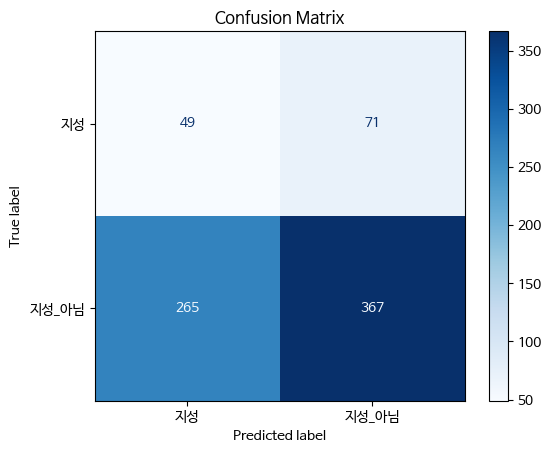

In [6]:
import os
import torch
import torchvision.models as models
import torchvision.transforms as T
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from PIL import Image
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Custom dataset
class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = os.listdir(root_dir)
        self.data = []

        for label in range(len(self.classes)):
            class_folder = os.path.join(root_dir, self.classes[label])
            for subfolder in os.listdir(class_folder):
                subfolder_path = os.path.join(class_folder, subfolder)
                if os.path.isdir(subfolder_path):
                    for filename in os.listdir(subfolder_path):
                        img_path = os.path.join(subfolder_path, filename)
                        if img_path.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                            self.data.append((img_path, label))

        print(f"Found {len(self.data)} images in {root_dir}")

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path, label = self.data[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, label

# 경로 및 배치 크기 설정
data_dir = "."
batch_size = 32

# 데이터 증강 포함한 이미지 전처리
transform = T.Compose([
    T.RandomResizedCrop(224, scale=(0.8, 1.0)),
    T.RandomHorizontalFlip(),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 학습 및 검증 데이터셋 생성
train_dataset = CustomDataset(os.path.join(data_dir, '/content/스킨_지성/train'), transform=transform)
valid_dataset = CustomDataset(os.path.join(data_dir, '/content/스킨_지성/valid'), transform=transform)

# 클래스 불균형 해결: 가중치 샘플링 적용
labels = [label for _, label in train_dataset.data]
label_counts = np.bincount(labels)
class_weights = 1. / label_counts
sample_weights = [class_weights[label] for label in labels]

# 가중치 샘플러 적용
sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=sampler)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

# 사전 학습된 resnext50_32x4d 모델 사용, 레이어 줄임
model = models.resnext50_32x4d(weights=models.ResNeXt50_32X4D_Weights.DEFAULT)

# 모든 레이어 학습 가능하도록 설정
for param in model.parameters():
    param.requires_grad = True

# 출력 레이어를 은닉층 1개로 축소
model.fc = torch.nn.Sequential(
    torch.nn.Dropout(0.7),  # 드롭아웃으로 과적합 방지 드롭아웃 0.5 -> 0.9
    torch.nn.Linear(model.fc.in_features, 128),  # 은닉층 1개
    torch.nn.BatchNorm1d(128), # 배치 정규화
    torch.nn.ReLU(),
    torch.nn.Linear(128, 1),  # 출력 레이어
    torch.nn.Sigmoid()  # Sigmoid 활성화 함수
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 손실 함수 및 옵티마이저 설정
criterion = torch.nn.BCELoss()  # 이진 분류에 적합한 손실 함수
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)

# Early Stopping 설정
early_stopping_patience = 5
best_val_accuracy = 0
patience_counter = 0

# 모델을 저장할 경로 설정
model_save_path = '지성모델.pth'

# 학습 과정
num_epochs = 40 # 에폭 20 -> 40
max_grad_norm = 2.0  # 그래디언트 클리핑 임계값 설정

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    train_loader_iter = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")

    for images, labels in train_loader_iter:
        images, labels = images.to(device), labels.to(device).float().view(-1, 1)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()

        # 그래디언트 클리핑 적용
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)

        optimizer.step()

        running_loss += loss.item()
        predicted = (outputs > 0.5).float()
        total_train += labels.size(0)
        correct_train += (predicted.eq(labels)).sum().item()

    train_accuracy = 100 * correct_train / total_train

    # 검증 평가
    model.eval()
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    with torch.no_grad():
        for images, labels in valid_loader:
            images, labels = images.to(device), labels.to(device).float().view(-1, 1)
            outputs = model(images)
            predicted = (outputs > 0.5).float()
            total += labels.size(0)
            correct += (predicted.eq(labels)).sum().item()
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    valid_accuracy = 100 * correct / total
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}, Train Accuracy: {train_accuracy}%, Validation Accuracy: {valid_accuracy}%")

    # Early Stopping 체크
    if valid_accuracy > best_val_accuracy:
        best_val_accuracy = valid_accuracy
        patience_counter = 0
        # 모델 저장
        # torch.save(model.state_dict(), model_save_path)
        # print(f"Model saved to {model_save_path}")
    else:
        patience_counter += 1
        if patience_counter >= early_stopping_patience:
            print("Early stopping triggered.")
            break

# 최종 모델 저장
torch.save(model.state_dict(), model_save_path)
print(f"Final model saved to {model_save_path}")


# 오분류표 시각화
conf_matrix = confusion_matrix(y_true, y_pred)

# 클래스 이름 가져오기
class_names = train_dataset.classes  # 원래 클래스 이름을 가져옵니다.

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


## 건성 -복합성 제거 후 모델

- 1)그래디언트 클리딩 2.0으로 해보기 -> 0.5
- 2)드롭아웃 0.5 -> 0.7 -> 0.9

- 살리는 걸로

- 개선 더 해보기

- 복합성 제거하지 않은 파일로 돌리기

- 데이터 복합성 이마 이미지를 추가해보기

In [ ]:
import zipfile
import os

# 압축 파일 경로
zip_path = '/content/drive/MyDrive/Skin_Modeling/스킨_건성_복합성빼고.zip'

# 압축을 풀 폴더 경로
extract_path = './'

# 압축 풀기
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# 압축이 풀린 파일 목록 확인
os.listdir(extract_path)

['.config',
 '스킨_복합성_건성제거',
 '스킨_건성_복합성빼고',
 'drive',
 '복합성모델_건성제거.pth',
 'sample_data']

In [ ]:
import os
import torch
import torchvision.models as models
import torchvision.transforms as T
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from PIL import Image
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Custom dataset
class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = os.listdir(root_dir)
        self.data = []

        for label in range(len(self.classes)):
            class_folder = os.path.join(root_dir, self.classes[label])
            for subfolder in os.listdir(class_folder):
                subfolder_path = os.path.join(class_folder, subfolder)
                if os.path.isdir(subfolder_path):
                    for filename in os.listdir(subfolder_path):
                        img_path = os.path.join(subfolder_path, filename)
                        if img_path.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                            self.data.append((img_path, label))

        print(f"Found {len(self.data)} images in {root_dir}")

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path, label = self.data[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, label

# 경로 및 배치 크기 설정
data_dir = "."
batch_size = 32

# 데이터 증강 포함한 이미지 전처리
transform = T.Compose([
    T.RandomResizedCrop(224, scale=(0.8, 1.0)),
    T.RandomHorizontalFlip(),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 학습 및 검증 데이터셋 생성
train_dataset = CustomDataset(os.path.join(data_dir, '/content/스킨_건성_복합성빼고/train'), transform=transform)
valid_dataset = CustomDataset(os.path.join(data_dir, '/content/스킨_건성_복합성빼고/valid'), transform=transform)

# 클래스 불균형 해결: 가중치 샘플링 적용
labels = [label for _, label in train_dataset.data]
label_counts = np.bincount(labels)
class_weights = 1. / label_counts
sample_weights = [class_weights[label] for label in labels]

# 가중치 샘플러 적용
sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=sampler)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

# 사전 학습된 resnext50_32x4d 모델 사용, 레이어 줄임
model = models.resnext50_32x4d(weights=models.ResNeXt50_32X4D_Weights.DEFAULT)

# 모든 레이어 학습 가능하도록 설정
for param in model.parameters():
    param.requires_grad = True

# 출력 레이어를 은닉층 1개로 축소, Dropout 확률을 0.7로 설정
model.fc = torch.nn.Sequential(
    torch.nn.Dropout(0.9),  # 드롭아웃 확률 0.7 ->0.9
    torch.nn.Linear(model.fc.in_features, 128),  # 은닉층 1개
    torch.nn.BatchNorm1d(128),  # 배치 정규화
    torch.nn.ReLU(),
    torch.nn.Linear(128, 1),  # 출력 레이어
    torch.nn.Sigmoid()  # Sigmoid 활성화 함수
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 손실 함수 및 옵티마이저 설정
criterion = torch.nn.BCELoss()  # 이진 분류에 적합한 손실 함수
optimizer = torch.optim.Adam(model.parameters(), lr=0.000005)  # 학습률 0.000005로 설정

# 그래디언트 클리핑 값 설정
clip_value = 0.5    # 그래디언트 클리핑을 0.5로 설정

# Early Stopping 설정
early_stopping_patience = 5
best_val_accuracy = 0
patience_counter = 0

# 모델을 저장할 경로 설정
model_save_path = '건성모델_복합성제거.pth'

# 학습 과정
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    train_loader_iter = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")

    for images, labels in train_loader_iter:
        images, labels = images.to(device), labels.to(device).float().view(-1, 1)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()

        # 그래디언트 클리핑 적용
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip_value)

        optimizer.step()

        running_loss += loss.item()
        predicted = (outputs > 0.5).float()
        total_train += labels.size(0)
        correct_train += (predicted.eq(labels)).sum().item()

    train_accuracy = 100 * correct_train / total_train

    # 검증 평가
    model.eval()
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    with torch.no_grad():
        for images, labels in valid_loader:
            images, labels = images.to(device), labels.to(device).float().view(-1, 1)
            outputs = model(images)
            predicted = (outputs > 0.5).float()
            total += labels.size(0)
            correct += (predicted.eq(labels)).sum().item()
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    valid_accuracy = 100 * correct / total
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}, Train Accuracy: {train_accuracy}%, Validation Accuracy: {valid_accuracy}%")

    # Early Stopping 체크
    if valid_accuracy > best_val_accuracy:
        best_val_accuracy = valid_accuracy
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= early_stopping_patience:
            print("Early stopping triggered.")
            break

# 최종 모델 저장
torch.save(model.state_dict(), model_save_path)
print(f"Final model saved to {model_save_path}")

# 오분류표 시각화
conf_matrix = confusion_matrix(y_true, y_pred)

# 클래스 이름 가져오기
class_names = train_dataset.classes  # 원래 클래스 이름을 가져옵니다.

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


Found 4356 images in /content/스킨_건성_복합성빼고/train
Found 491 images in /content/스킨_건성_복합성빼고/valid


Epoch 1/20: 100%|██████████| 137/137 [01:19<00:00,  1.71it/s]


Epoch 1/20, Loss: 0.7065203463944205, Train Accuracy: 49.70156106519743%, Validation Accuracy: 53.564154786150716%


Epoch 2/20: 100%|██████████| 137/137 [01:20<00:00,  1.71it/s]


Epoch 2/20, Loss: 0.7052778732167543, Train Accuracy: 50.71166207529844%, Validation Accuracy: 51.323828920570264%


Epoch 3/20: 100%|██████████| 137/137 [01:19<00:00,  1.72it/s]


Epoch 3/20, Loss: 0.701526549175708, Train Accuracy: 50.8494031221304%, Validation Accuracy: 51.73116089613035%


Epoch 4/20: 100%|██████████| 137/137 [01:19<00:00,  1.72it/s]


Epoch 4/20, Loss: 0.6952815978196416, Train Accuracy: 52.11202938475666%, Validation Accuracy: 52.13849287169043%


Epoch 5/20: 100%|██████████| 137/137 [01:19<00:00,  1.73it/s]


Epoch 5/20, Loss: 0.697564014988224, Train Accuracy: 51.95133149678604%, Validation Accuracy: 54.378818737270876%


Epoch 6/20: 100%|██████████| 137/137 [01:20<00:00,  1.71it/s]


Epoch 6/20, Loss: 0.6994512329136369, Train Accuracy: 52.73186409550046%, Validation Accuracy: 49.89816700610998%


Epoch 7/20: 100%|██████████| 137/137 [01:21<00:00,  1.67it/s]


Epoch 7/20, Loss: 0.6916727854387603, Train Accuracy: 54.637281910009186%, Validation Accuracy: 52.13849287169043%


Epoch 8/20:  55%|█████▍    | 75/137 [00:44<00:36,  1.69it/s]


KeyboardInterrupt: 

## Argmax

In [ ]:
import os
import torch
import torchvision.transforms as T
from PIL import Image

# 모델 로드 함수
def load_model(model_path):
    model = torch.nn.Sequential(
        torch.nn.Dropout(0.5),
        torch.nn.Linear(2048, 128),  # ResNeXt50의 출력 크기
        torch.nn.ReLU(),
        torch.nn.Linear(128, 2),  # 두 개의 클래스를 예측
        torch.nn.Softmax(dim=1)    # Softmax로 Class 확률을 반환
    )
    model.load_state_dict(torch.load(model_path))
    model.eval()
    return model

# 이미지 전처리
def preprocess_image(image_path):
    transform = T.Compose([
        T.Resize((224, 224)),
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image = Image.open(image_path).convert('RGB')
    return transform(image).unsqueeze(0)  # 배치 차원 추가

# 예측 함수
def predict_class(model, image_tensor):
    with torch.no_grad():
        output = model(image_tensor)
        probabilities = output.numpy().flatten()  # 확률 배열로 변환
    return probabilities  # Class 0과 Class 1의 확률 반환

# 모델 경로 설정
model_paths = {
    "복합성모델": "/content/복합성모델.pth",
    "건성모델": "/content/건성모델.pth",
    "지성모델": "/content/지성모델.pth",
    "중성모델": "/content/중성모델.pth"
}

# 테스트 이미지 경로 설정
test_image_path = "/content/test_image.jpg"  # 테스트 이미지 경로

# Class 1 확률이 가장 높은 모델 찾기
highest_prob = 0
best_model_name = None

# 이미지 전처리
image_tensor = preprocess_image(test_image_path)

# 모든 모델에 대해 예측 수행
for model_name, model_path in model_paths.items():
    model = load_model(model_path)
    prob = predict_class(model, image_tensor)

    # Class 1의 확률 확인
    class_1_prob = prob[1]
    if class_1_prob > highest_prob:
        highest_prob = class_1_prob
        best_model_name = model_name

# 결과 출력
if best_model_name:
    print(f"가장 높은 Class 1 확률을 가진 모델: {best_model_name}, 확률: {highest_prob:.4f}")
else:
    print("모델을 찾을 수 없습니다.")
